## 1. Introduction

>Heart disease, also known as cardiovascular disease, describes the range of conditions that affect the heart.

**Types of heart diseases include:**
* Abnormal heart rhythms(arrhythmias)
* Heart valve diseases
* Myocardial infarction(heart attack)
* Heart failure
* Congenital heart defects
* Dilated cardiomyopathy

Risk factors for heart disease can be classified as either modifiable or non-modifiable.

`Non-Modifiable` risk-factors include:

- Age
- Gender
- Family history
- Genetics

`Modifiable` risk-factors include:

- Smoking
- High Blood Pressure(Hypertension)
- High Cholesterol
- Drug Abuse
- Diabetes
- Obesisty
- Physical inactivity




## 2. Project Goal

>In this project, the main objective is to develop a machine learning model that can classify a person's risk of having heart disease, with 1 being at a high risk and 0 being at a low risk.



## 3. Project Data

The dataset used was sourced from [kaggle](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset)

## 4. Features

The features used for classification include:

|Feature|Assigned Code|Unit|Description|
|:-----|:-----|:-----|:-----|
|Age|age|Years|Patient's age|
|Gender|gender|1=male; 0=female|The sex of the patient|
|Chest pain type|chestpain|codes from 0-3|<ul><li>0:**Typical Angina**: Common heart-related chest pain.</li><li> 1:**Atypical Angina**: Chest discomfort that's not typical angina.</li><li>2:**Non-Anginal pain**: Pain not related to the heart.</li><li> 3:**Asymptomatic**:Absence of chest pain, but hints at potential heart issues.</li></ul>|
|Resting blood pressure|restingBP|in mmHg |Measures blood pressure when relaxed. Anything above 120/90 is typically cause for concern|
|Serum cholesterol|serumcholestrol|in mg/dl|Indicates the amount of total cholesterol in blood.Elevated levels  can be a precursor to artery blockages|
|Fasting blood sugar|fastingbloodsugar|0,1|Highlights if blood sugar levels are unusually high when fasting.The fasting blood sugar> 120mg/dl<ul><li>1=true(signals diabetes)</li><li>0=false</li></ul>|
|Resting electrocardiogram results|restingrelectro|codes from 0-2|The electrical rhythm of the heart<ul><li>0:**Normal**: nothing to note</li><li> 1:**ST-T Wave abnormality**: T wave inversions and/or ST wave elevation or depression of > 0.05mV. Potential disturbances in rhythm</li><li>2: **Possible or definite left ventricular hypertrophy**:Indicates the heart's left side might be working too hard.</li></ul>|
|Maximum heart rate achieved|maxheartrate|71-202bpm|The heart's top speed during tests, suggesting how well or poorly the heart pumps.The average resting heart rate is between 60 and 100.The more fit you are, the lower your resting heart rate.The maximum rate is based on your age, as subtracted from 220(So for a 50-year-old, maximum heart rate is 220 minus 50, or 170 beats per minute.)|
|Exercise induced angina|exerciseangia|0,1|Does physical activity induce pain? If yes, it's a potential red flag.<ul><li>0:No</li><li> 1:Yes</li></ul>|
|Oldpeak =ST|oldpeak|0-6.2|ST-depression induced by exercise relative to rest,looks at stress during exercise(unhealthy heart will stress more)|
|Slope of the peak exercise ST segment|slope|codes from 1-3|<ul><li>1:**Upsloping**: Better heart rate with exercise(uncommon)</li><li> 2:**Flat**: Minimal change(typical healthy heart)</li><li>3:**Downsloping**: Signs of unhealthy heart</li></ul>|
|Number of major vessels|noofmajorvessels|codes from 0-3|coloured by flourosopy<ul><li>coloured vessel means the doctor can see blood passing through</li><li>the more blood movement the better, indicates no clots</li></ul>|

## 5. Workflow

The steps followed include:
1. [Import the necessary libraries](#libraries)
2. [Loading the dataset](#dataset)
3. [Exploratory Data Analysis](#eda)
4. [Cleaning and Transforming the data](cleaning)
5. [Feature Selection](#selection) 
6. [Feature Scaling](#scaling)
7. [Modeling](#model)
8. [Prediction](#prediction)
9. [Comparison](#comparison)
10. [Conclusion](#Conclusion)



<a name="libraries"></a>
### 1. Importing libraries
I'll be using pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Importing all libraries needed 

# regular EDA and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50) # ensure all columns(if below 50) are displayed
%matplotlib inline 

 
#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### 2.Loading the dataset

In [2]:
heart_df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
heart_df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
heart_df.tail()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1
999,9990855,25,1,0,158,270,0,0,143,1,4.7,0,0,0


### 3. Exploratory Data Analysis

In [4]:
#shape
heart_df.shape

(1000, 14)

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [6]:
# find out count of each class
heart_df.target.value_counts()

1    580
0    420
Name: target, dtype: int64

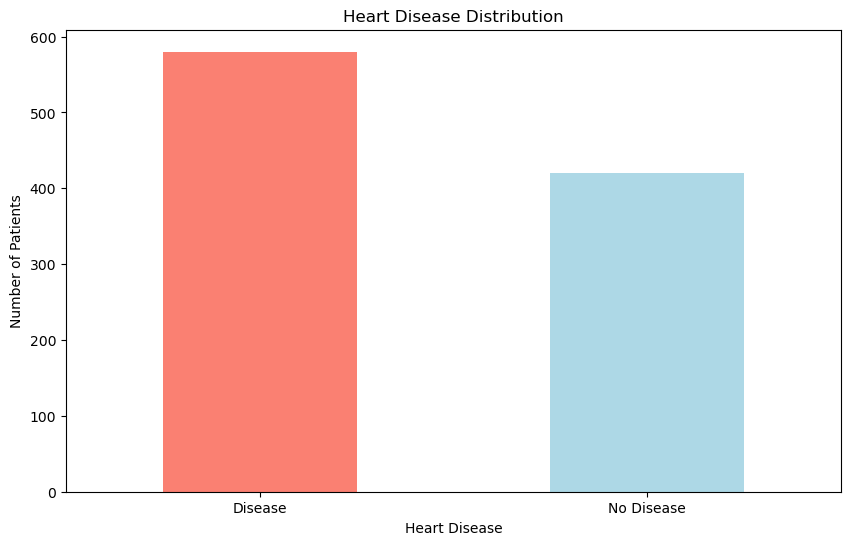

In [107]:
# checking how heart disease is distributed
heart_df.target.value_counts().plot(kind="bar", color=["salmon","lightblue"], figsize=(10,6));

label = ["Disease", "No Disease"]
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
plt.xticks([0, 1], label, rotation=0);

In [8]:
#checking for missing values
heart_df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [9]:
# checking for duplicate rows
heart_df.duplicated().sum()

0

In [67]:
#statistical summary
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,49.2420,17.864730,20.0,34.00,49.0,64.25,80.0
gender,1000.0,0.7650,0.424211,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,0.9800,0.953157,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,151.7470,29.965228,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,311.4470,132.443801,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,0.2960,0.456719,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,0.7480,0.770123,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,145.4770,34.190268,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,0.4980,0.500246,0.0,0.00,0.0,1.00,1.0
oldpeak,1000.0,2.7077,1.720753,0.0,1.30,2.4,4.10,6.2


In [11]:
heart_df.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

#### Heart disease Frequency according to Gender

In [12]:
heart_df.gender.value_counts()

1    765
0    235
Name: gender, dtype: int64

In [13]:
# Compare target column and gender column
pd.crosstab(heart_df.target, heart_df.gender)

gender,0,1
target,,
0,102,318
1,133,447


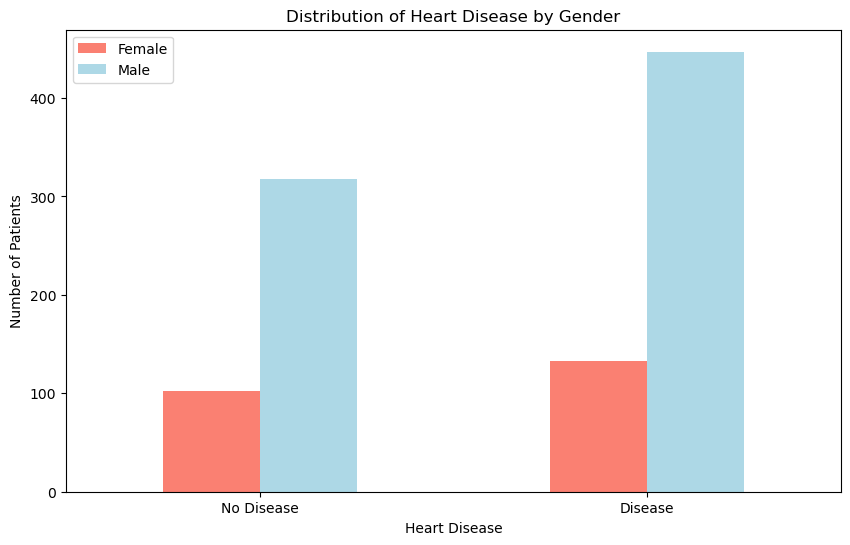

In [106]:
# plot of the cross tab
pd.crosstab(heart_df.target, heart_df.gender).plot(kind="bar",
                                                  figsize=(10,6),
                                                  color=["salmon", "lightblue"])
labels = ["No Disease", "Disease"]
positions = [0, 1]
plt.title("Distribution of Heart Disease by Gender")
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
plt.xticks(positions, labels, rotation=0)
plt.legend(["Female", "Male"]);

From the plot, we can observe that for people that don't have heart disease(xlabel=0),and those that have heart diease(xlabel=1) there are more males than females. I think,the huge ratios can be influenced by the fact that about 70%of the patients in the dataset are male and 30% are female.

In [15]:
heart_df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

#### age vs  maxheartrate for heart disease

In [16]:
heart_df.age[heart_df.target==1]

0      53
3      43
4      31
5      24
6      79
       ..
992    77
993    25
995    48
997    69
998    45
Name: age, Length: 580, dtype: int64

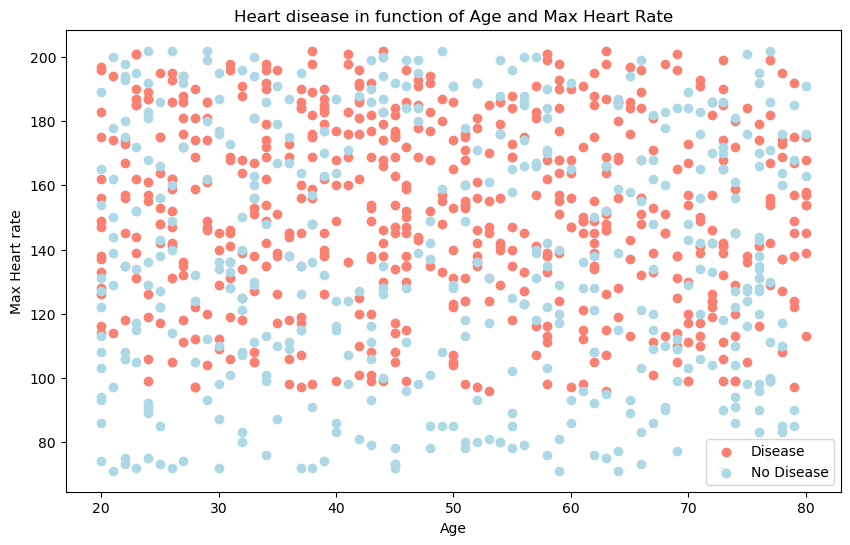

In [17]:
# create a figure
fig, ax = plt.subplots(figsize=(10,6))

# scatter with heart disease
plt.scatter(heart_df.age[heart_df.target==1],
                heart_df.maxheartrate[heart_df.target==1],
                c="salmon")

# scatter without heart disease
plt.scatter(heart_df.age[heart_df.target==0],
           heart_df.maxheartrate[heart_df.target==0],
           c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.legend(["Disease", "No Disease"])
ax.set_xlabel("Age")
ax.set_ylabel("Max Heart rate");

There seems to be no linear correlation between the age and maxheartrate for patients with and without heart disease.

Text(0, 0.5, 'Frequency')

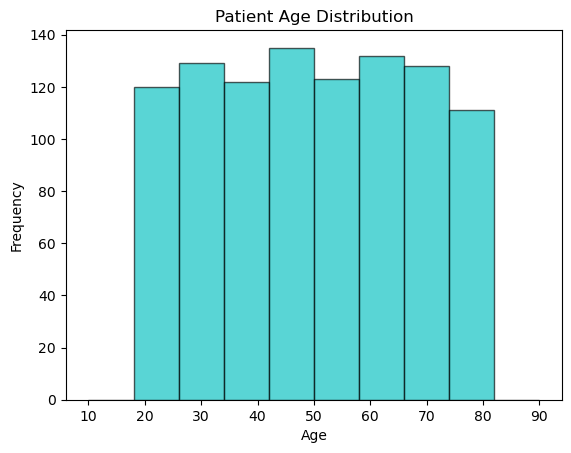

In [98]:
# visualizing the frequency of the patients' ages
plt.hist(heart_df.age, color='c', edgecolor='k', alpha=0.65, range = [10, 90] )
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

The ages of the patients are almost uniformly distributed

#### How chestpain type relates to heart disease

<ul><li>0:Typical angina: chest pain related decrease blood supply to the heart</li><li> 1:Atypical angina: chest pain not related to the heart</li><li>2: Non-anginal pain: typically esophageol spasms (non-heart related)</li><li> 3:Asymptomatic:chest pain not showing signs of disease</li></ul>

In [19]:
pd.crosstab(heart_df.chestpain, heart_df.target)

target,0,1
chestpain,,
0,312,108
1,70,154
2,33,279
3,5,39


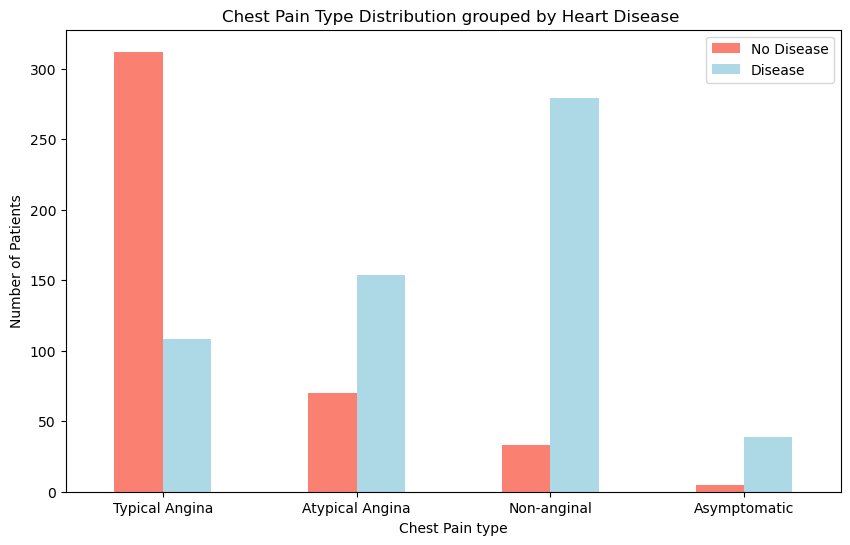

In [105]:
# visual of above

pd.crosstab(heart_df.chestpain, heart_df.target).plot(kind="bar",
                                                     figsize=(10,6),
                                                     color=["salmon", "lightblue"])

labels = ["Typical Angina", "Atypical Angina", "Non-anginal","Asymptomatic"]
label_pos = [0, 1, 2, 3]
plt.title("Chest Pain Type Distribution grouped by Heart Disease ")
plt.xlabel("Chest Pain type")
plt.ylabel("Number of Patients")
plt.xticks(label_pos, labels, rotation=0)
plt.legend(["No Disease", "Disease"]);


#### Correlation Matrix

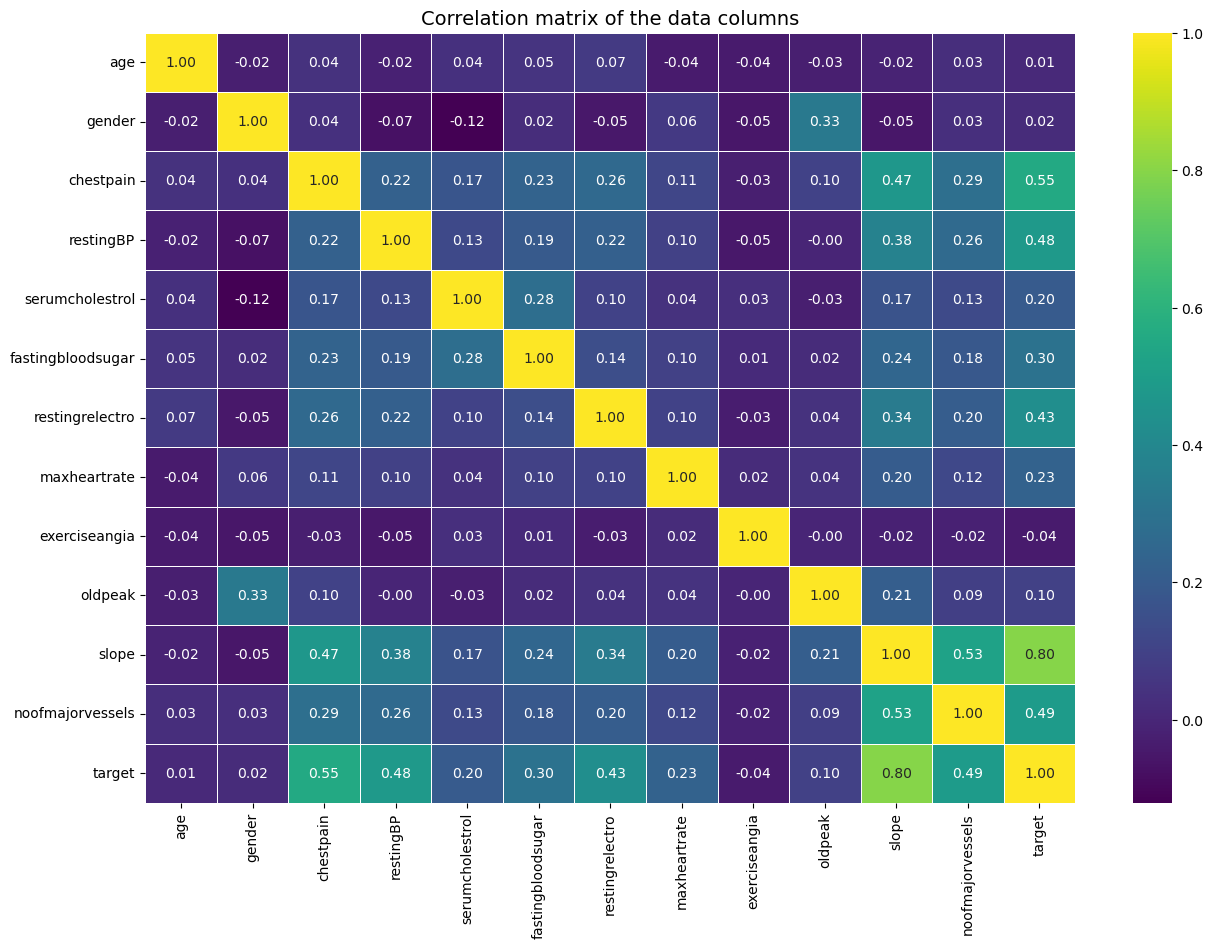

In [101]:
# correlation matrix
heart_corr = heart_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(heart_corr,
                 fmt='.2f',
                 cmap='viridis',
                 annot=True,
                 linewidths=0.5);
plt.title("Correlation matrix of the data columns", fontsize=14);


#### Average of some features for the classes.
  

In [27]:
# getting averages of the features then grouping them according to class
features_of_interest = ["age", "serumcholestrol", "restingBP", "maxheartrate"]
heart_df.groupby(by="target")[features_of_interest].mean().apply(lambda x: round(x, 2))

,age,serumcholestrol,restingBP,maxheartrate
target,,,,
0,49.07,281.06,134.77,136.31
1,49.37,333.45,164.04,152.12


- It appears that the average age of people with and without heart disease is the same i.e ~49 years.
- The average serum cholestrol of patient's presenting heart disease is 52.4mg/dl higher than those that are non-presenting.
- The average resting blood pressure of patient's presenting heart disease is 29.27mmHg higher than those that are non-presenting.
- The average maximum heart rate of patient's presenting heart disease is 15.81bpm higher than those that are non-presenting.

#### Old peak distribution according to class

<!-- <img src="ECG Interpretation.jpg", alt="isolated", height=50, width=50/> -->
Oldpeak measures the degree of abnormality in the ECG during peak exercise compared to rest, and it's used as an indicator of heart health and potential cardiac issues

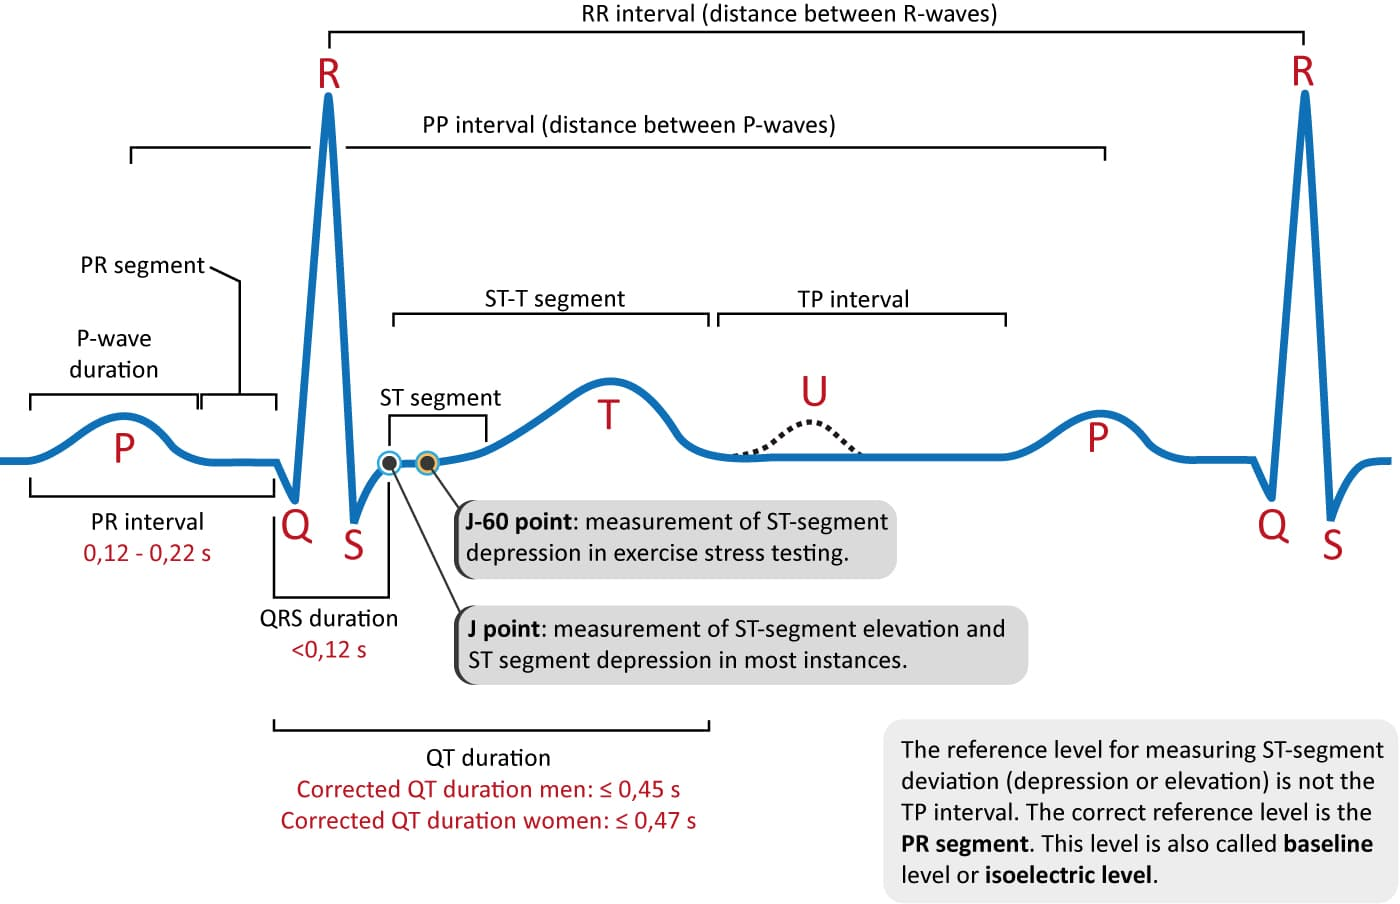

#### Slope of the peak exercise ST segment relation to target

<ul><li>1:Upsloping: better heart rate with execise(uncommon)</li><li> 2:flat: minimal change(typical healthy heart)</li><li>3: downsloping: signs of unhealthy heart</li></ul>

In [45]:
heart_df.slope.value_counts()

2    322
1    299
3    199
0    180
Name: slope, dtype: int64

In [47]:
pd.crosstab(heart_df.slope, heart_df.target).T

slope,0,1,2,3
target,,,,
0,180,228,12,0
1,0,71,310,199


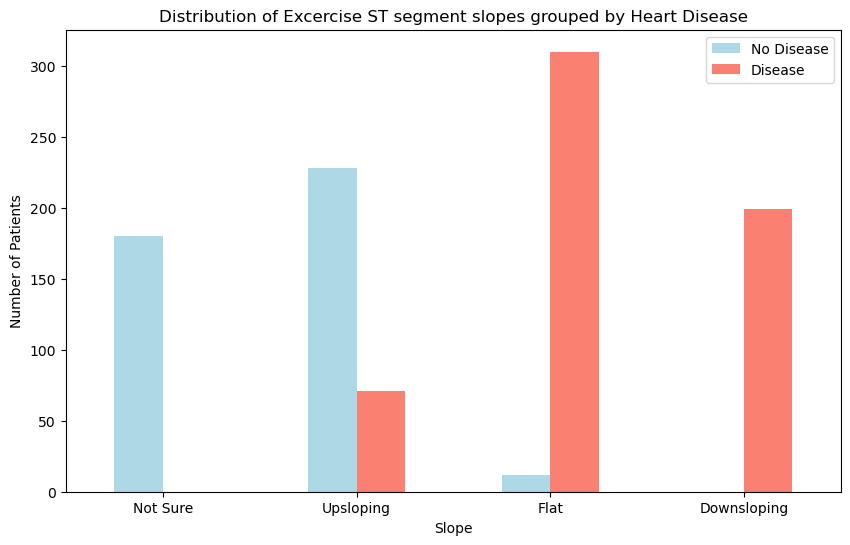

In [104]:
pd.crosstab(heart_df.slope, heart_df.target).plot(kind="bar",
                                                 figsize=(10,6),
                                                 color=["lightblue","salmon"])
labels = ["Not Sure", "Upsloping", "Flat","Downsloping"]
positions = [0, 1, 2, 3]
plt.title("Distribution of Excercise ST segment slopes grouped by Heart Disease")
plt.xlabel("Slope")
plt.ylabel("Number of Patients")
plt.xticks(positions, labels, rotation=0)
plt.legend(["No Disease","Disease"]);

In [65]:
people_with_zero = heart_df.loc[heart_df["slope"] == 0]
people_with_zero

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,27,1,0,129,135,0,1,192,1,1.0,0,0,0
19,35,1,0,127,269,0,0,87,1,3.8,0,1,0
25,71,1,1,101,352,0,1,183,0,3.6,0,0,0
26,46,1,0,198,253,0,0,199,1,2.1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,65,1,0,125,346,0,1,93,1,3.9,0,0,0
988,74,1,0,136,279,0,1,122,0,1.2,0,0,0
991,24,1,0,170,354,0,0,90,1,1.5,0,0,0
994,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [76]:
# oldest person(s) with heart disease
oldest_person_1 = heart_df[(heart_df["age"] == heart_df["age"].max()) & (heart_df["target"] == 1)]
oldest_person_1

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
177,80,1,2,126,427,1,0,145,0,4.1,2,2,1
290,80,1,1,197,194,0,2,168,0,5.9,3,1,1
451,80,1,2,134,277,0,0,154,0,0.7,3,3,1
461,80,1,1,197,246,1,1,158,1,3.5,2,2,1
547,80,0,1,191,433,1,1,154,1,3.2,3,3,1
623,80,0,2,98,460,1,1,139,1,2.6,3,3,1
743,80,1,2,177,452,0,1,157,0,0.4,3,1,1
923,80,1,2,171,356,1,0,175,1,2.4,2,1,1
967,80,1,1,199,212,0,1,113,0,0.6,1,0,1


In [78]:
# youngest person(s) with heart disease
youngest_person_1 = heart_df[(heart_df["age"] == heart_df["age"].min()) & (heart_df["target"] == 1)]
youngest_person_1

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
53,20,1,2,189,231,0,0,114,1,2.4,3,1,1
152,20,1,1,163,0,0,0,147,1,5.5,3,3,1
163,20,0,0,189,545,0,2,116,1,3.2,2,3,1
186,20,1,0,156,354,0,0,197,1,2.1,3,1,1
202,20,0,0,186,359,1,2,196,0,2.7,3,2,1
229,20,0,0,183,0,0,2,175,1,1.3,3,2,1
234,20,1,0,140,498,0,0,137,1,0.2,3,2,1
324,20,1,2,136,264,0,1,162,0,5.0,3,3,1
550,20,0,1,198,280,1,2,183,0,3.2,3,0,1
598,20,1,1,168,383,1,0,128,0,2.3,1,0,1


### 4. Cleaning the data

In [108]:
heart_df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

Dropping the `patientid` column since it's useful in prediction

In [109]:
heart_df.drop('patientid', axis=1, inplace=True)
heart_df.sample(2)

KeyError: "['patientid'] not found in axis"

### 5. Feature Selection


In [30]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [31]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#copying and test features
X_train_copy = np.copy(X_train)
X_test_copy = np.copy(X_test)

In [34]:
# sklearn models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# create function to train and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    
    # set random seed
    np.random.seed(42)
    
    # make dictionary to keep model scores
    model_scores = {}
    
    # loop through model
    for name, model in models.items():
        # fit the model to data
        model.fit(X_train, y_train)
        
        # evaluate model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [35]:
model_scores = fit_score(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)
model_scores

C:\Users\chiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.945, 'Random Forest': 0.99, 'Decision Tree': 0.96}

#### Model Comparison

In [36]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare_T = model_compare.T
model_compare_T

,accuracy
Logistic Regression,0.945
Random Forest,0.990
Decision Tree,0.960


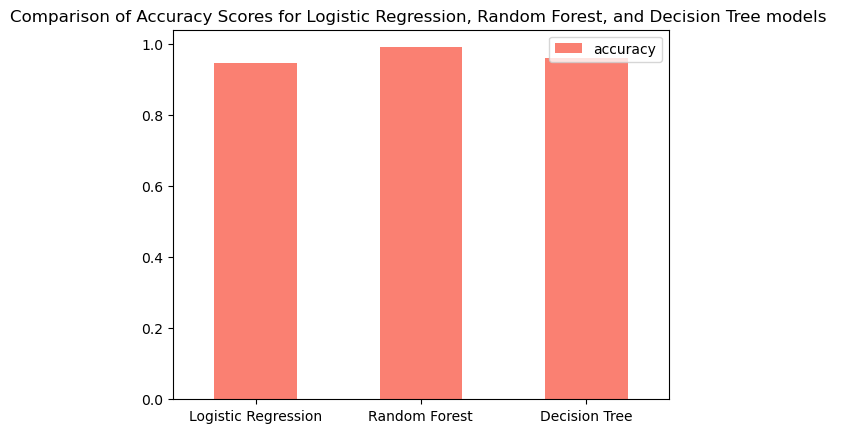

In [115]:
# visually comparing the models
model_compare_T.plot.bar(color="salmon");
plt.xticks(rotation=0)
plt.title("Comparison of Accuracy Scores for Logistic Regression, Random Forest, and Decision Tree models ")
plt.legend(loc="upper right");

#### Confusion Martrix Code
A confusion matrix is an error matrix. It is presented as a table in which the predicted class is compared with the actual class.

In [ ]:
confusion_matrix = confusion_matrix(actual, predicted)

### 6. Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
#scaler instance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)

### 7.Modelling

#### 7.1 Random Forest Classifier

In [23]:
#USING RAW DATA

#instance of the class
rand = RandomForestClassifier()

#fitting the model
rand.fit(X_train, y_train)

#predicting
y_pred_raw = rand.predict(X_test)

In [24]:
#fitting using standardized data
rand.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
#predicting using standardized
y_pred_std = rand.predict(X_test_scaled)

In [26]:
# accuracy raw
accuracy1 = accuracy_score(y_test, y_pred_raw)
#accuracy standardized
accuracy2 = accuracy_score(y_test, y_pred_std)

print(accuracy1, accuracy2)

0.99 0.985


In [27]:
# cross validation using raw
cv_score1 = cross_val_score(rand, X_train, y_train, cv=5)
mean_cv_score1 = np.mean(cv_score1)
mean_cv_score1

0.97625

In [28]:
# cross validation using standardized
cv_score2 = cross_val_score(rand, X_train_scaled, y_train, cv=5)
mean_cv_score2 = np.mean(cv_score2)
mean_cv_score2

0.9650000000000001

In [29]:
precision_score(y_test, y_pred_raw)

0.9914529914529915

In [30]:
precision_score(y_test, y_pred_std)

0.975

#### 7.2 Decision Tree Classifier

In [31]:
#model instance
tree_model = DecisionTreeClassifier()

#fit the model
tree_model.fit(X_train, y_train)

#predicting
y_preds = tree_model.predict(X_test)

In [32]:
#accuracy
acc = accuracy_score(y_test, y_preds)
acc

0.965

In [33]:
cv_score = cross_val_score(tree_model, X_train, y_train, )
mean_cv_score = np.mean(cv_score)
mean_cv_score

0.9537500000000001

In [34]:
precision_score(y_test, y_preds)

0.9583333333333334

#### 7.3 Neural Network

In [35]:
# importing required libraries to build NN

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [36]:
# checking training and testing sizes
print('X_train:', np.shape(X_train_scaled))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test_scaled))
print('y_test:', np.shape(y_test))

X_train: (800, 12)
y_train: (800,)
X_test: (200, 12)
y_test: (200,)


In [37]:
# building the model using Sequential API
nn_model = Sequential()

# input layer
nn_model.add(Dense(units=16,\
               activation='relu',\
               input_shape=(12,)))

# output layer
nn_model.add(Dense(1, activation='sigmoid'))

#optimizer
adam = keras.optimizers.Adam(learning_rate=0.001)

# compiling the model
nn_model.compile(loss='binary_crossentropy',\
                 optimizer=adam,\
                metrics=["accuracy"])

In [38]:
# training the model
nn_model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20


25/25 [==============================] - 1s 3ms/step - loss: 0.7194 - accuracy: 0.5175
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6413
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7212
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7862
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8150
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8487
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8800
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.8900
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2876 - accuracy: 0.8925
Epoch 11/20
25/25

In [39]:
# evaluating the modeL
loss_and_metrics = nn_model.evaluate(X_test_scaled, y_test)
print(loss_and_metrics)
print('loss=', loss_and_metrics[0])
print('accuracy=', loss_and_metrics[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.9700
[0.1409936100244522, 0.9700000286102295]
loss= 0.1409936100244522
accuracy= 0.9700000286102295


In [40]:
# predicting
predicted = nn_model.predict(X_test_scaled)

7/7 [==============================] - 0s 1ms/step


In [42]:
# precision_score(y_test, predicted)

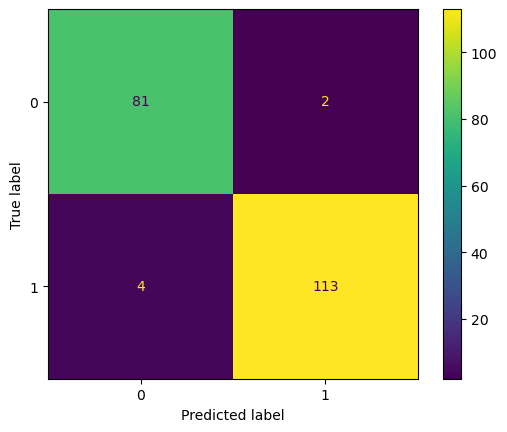

In [43]:
# evaluation of predictions using confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

predicted = tf.squeeze(predicted)
predicted = np.array([1 if x>=0.5 else 0 for x in predicted])

actual = np.array(y_test)

conf_mtx = confusion_matrix(actual, predicted)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)
display.plot()


In [45]:
heart_df.sample(2)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
194,62,1,0,125,264,0,0,92,0,2.2,0,0,0
402,43,1,2,150,353,0,1,149,1,3.2,2,1,1


In [49]:
# prediction test
test_prediction = nn_model.predict(33,0,10,160,436,0,1,120,1,2.5,1,1)
len(test_prediction)

TypeError: Model.predict() takes from 2 to 9 positional arguments but 13 were given